# Installs

In [ ]:
!pip install torchaudio==0.12.1
!pip install transformers
!ls *.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ICE-13.wav


# Imports

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import torch

from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# ICE-13. Audio Features - 3 (100 points)
Please download the input audio from the following link:<br> https://drive.google.com/file/d/1VzVMDZdMQatbEpEqkYFeBakLci4z1ttW/view?usp=share_link <br><br>

In [ ]:
f_name = "ICE-13.wav"
if not os.path.exists("ICE 13 Files/"):
    ! gdown --folder https://drive.google.com/drive/folders/134XnlevisIB5HVR0LRat_pVSeQcXCQtm?usp=sharing
    shutil.move("ICE 13 Files/" + f_name, f_name)

# Question 1 (10 points)

### What is Word Error Rate (WER) ? Explain briefly .

WER is the score of how many insertions, deletions, and substitutions are made by an algorithm performing automatic speech recognition. This score is a ratio, and as such is robust to the length of the speech/text being worked with.

# Question 2 (20 points)

- Give an example for WER . (10 points)

- Calculate WER for the example from formula given in lecture . (10 points)

### Please dont use same example given in lecture (If used will be awarded 0 ) 

If there is a problem where the transcript text is 82 words long, 7 words were inserted, 2 were deleted, and 5 were substituted, then:

WER = (7 + 2 + 5) / 82

WER = 14 / 82

WER = 0.1707

# Question 3 (20 points)

### Please list atleast 2 algorithms commonly used by Speech-to-Text and NLP applications to enhance predictions. Briefly explain each one of them and their impact in Speech to text .

- Each algorithm is awarded with 10 points . Max 20 points .


First there is the Mel Frequency Cepstral Coefficients (MFCC). This algorithm takes a Mel Spectrogram and processes even further by compressing certain frequency bands of the spectrogram into a representation. The frequencies compressed correspond to the frequencies humans speak at, so MFCCs create a lower-storage, higher-information-density data that is aimed at sounds specifically generated by human speech.

Second is the Connectionist Temporal Classification (CTC) Algorithm. This algorithm takes in the continuous audio file, and outputs the segments where the algorithm has detected there to be a change in characters. In essence, it segments the audio sounds of individual characters being spoken within the audio data. This makes a ML algorithm's job at character prediction easier because it's less likely to be confused by audio that actually belongs to another character, as can happen in naive, regular-time-based segmentation.

## Task 1 (10 points)

- Visualize above audio file  (x axis : time, y axis : amplitude)

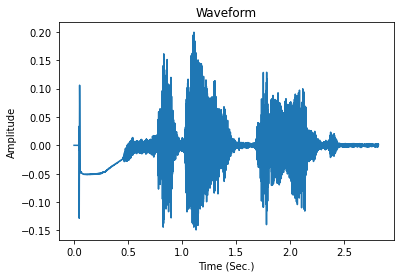

In [ ]:
# Load audio file
audio, sr = librosa.load(f_name)

# Values
plt.plot(audio)

# Labels
plt.title("Waveform")
plt.xlabel("Time (Sec.)")
plt.ylabel("Amplitude")

# xticks
a = audio.shape[0]
ss = a / ((a / sr) * 2)
xticks = np.arange(0, a + 1, ss)
xtick_labels = np.arange(0, a / sr + 0.5, 0.5)
plt.xticks(xticks, xtick_labels)

plt.show()

## Task 2 (20 points)

- Use above audio file i.e (ICE-13.wav)
- Import a pretrained model  (10 points) [**Hint** - Wav2Vec2ForCTC, Wav2Vec2Tokenizer ]

- Print sampling rate of the audio (10 points)

In [ ]:
# Load pre-trained models
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Print sampling rate
print(sr)

22050


## Task 3 (20 points)

- Use above audio file i.e (ICE-13.wav)
- Use the pretained model used above and convert speech to text . (10 points)
- Print the convereted text without fail (10 points)

In [ ]:
# Resample audio as the processor doesn't like the sampling rate
sr_r = 16000
audio_r = librosa.resample(audio, orig_sr=sr, target_sr=sr_r)

# Decode audio
i = processor(audio_r, sampling_rate=sr_r, return_tensors="pt")
with torch.no_grad():
    l = model(**i).logits
p_ids = torch.argmax(l, dim=-1)

# Transcribe speech
transc= processor.batch_decode(p_ids)

# View retrieved text
for t in transc:
    print(t)

DEEP LEARNING IS AMAZINGE
